In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['figure.dpi'] = 144

In [3]:
vectors = pd.read_csv('vec.csv')

In [4]:
vector_coords = vectors[(vectors.type == "vector") & (vectors.name == "posX:vector")]

In [5]:
def string_of_floats_to_list_of_floats(string, separator):
    return [float(n) for n in string.split(separator)]

In [6]:
x = string_of_floats_to_list_of_floats(vector_coords.iloc[[0]].vectime.values[0], ' ')

In [7]:
y = []

for t in x:
    tmp = 0
    for v in range(len(vector_coords)):
        times = string_of_floats_to_list_of_floats(vector_coords.iloc[[v]].vectime.values[0], ' ')
        if t in times:
            tmp += 1
    y.append(tmp)

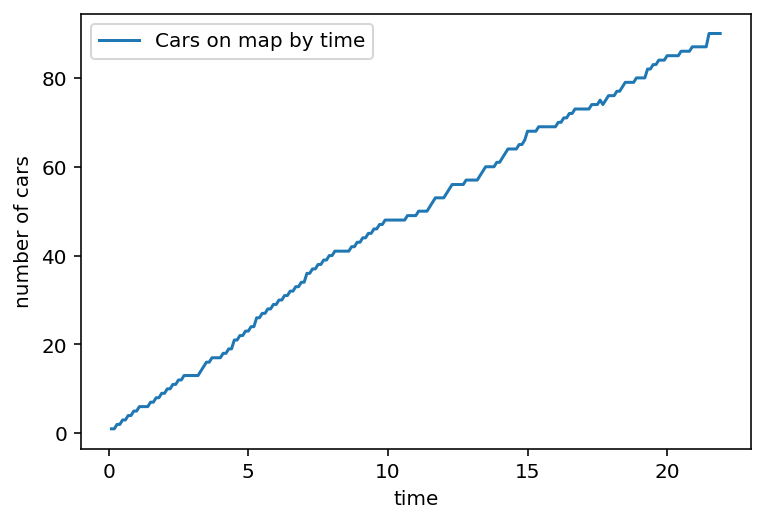

In [8]:
plt.plot(x,y, label="Cars on map by time")
plt.xlabel("time")
plt.ylabel("number of cars")
plt.legend()

In [9]:
car0 = vectors[(vectors.type == "vector") & (vectors.name == "allDetectedCars")].iloc[[0]]

In [10]:
x = string_of_floats_to_list_of_floats(car0.vectime.values[0], ' ')

In [11]:
y = string_of_floats_to_list_of_floats(car0.vecvalue.values[0], ' ')

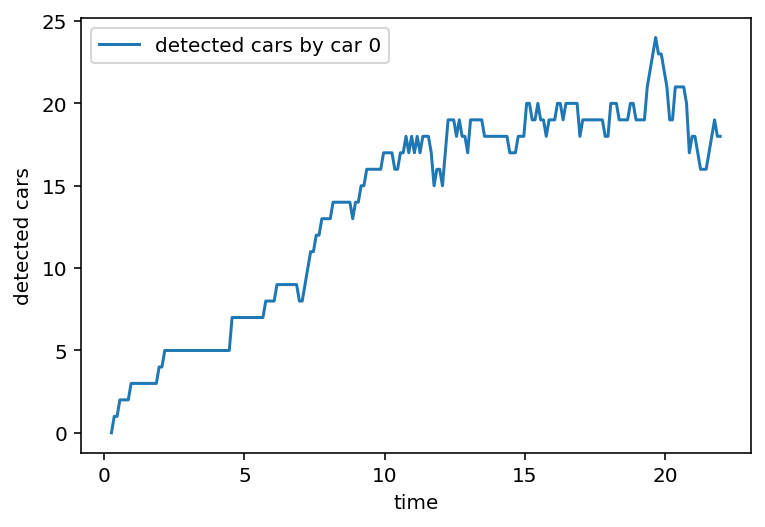

In [12]:
plt.plot(x,y, label="detected cars by car 0")
plt.xlabel("time")
plt.ylabel("detected cars")
plt.legend()

In [13]:
cbr0 = vectors[(vectors.type == "vector") & (vectors.name == "CBR.VanetRx")].iloc[[0]]

In [14]:
x = string_of_floats_to_list_of_floats(cbr0.vectime.values[0], ' ')

In [15]:
y = string_of_floats_to_list_of_floats(cbr0.vecvalue.values[0], ' ')

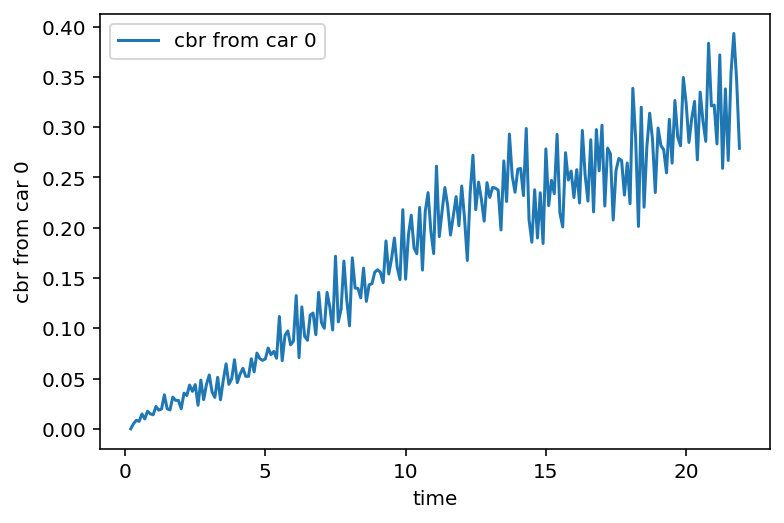

In [16]:
plt.plot(x,y, label="cbr from car 0")
plt.xlabel("time")
plt.ylabel("cbr from car 0")
plt.legend()

In [17]:
cbr = vectors[(vectors.type == "vector") & (vectors.name == "CBR.VanetRx")]

In [18]:
vectimes = [string_of_floats_to_list_of_floats(c.vectime, ' ') for c in cbr.itertuples()]
vecvalues = [string_of_floats_to_list_of_floats(c.vecvalue, ' ') for c in cbr.itertuples()]

time_values = []

for i in range(len(vectimes)):
    time_values.append(list(zip(vectimes[i], vecvalues[i])))

In [23]:
time_values

[[(0.2, 0.0),
  (0.3, 0.00504),
  (0.4, 0.00848),
  (0.5, 0.00744),
  (0.6, 0.0148),
  (0.7, 0.00984),
  (0.8, 0.01752),
  (0.9, 0.01488),
  (1.0, 0.01392),
  (1.1, 0.02224),
  (1.2, 0.01856),
  (1.3, 0.01976),
  (1.4, 0.03384),
  (1.5, 0.01992),
  (1.6, 0.0188),
  (1.7, 0.03152),
  (1.8, 0.02832),
  (1.9, 0.02832),
  (2.0, 0.02),
  (2.1, 0.03552),
  (2.2, 0.03312),
  (2.3, 0.04352),
  (2.4, 0.03728),
  (2.5, 0.044),
  (2.6, 0.02344),
  (2.7, 0.04848),
  (2.8, 0.02904),
  (2.9, 0.04408),
  (3.0, 0.0536),
  (3.1, 0.03672),
  (3.2, 0.03128),
  (3.3, 0.05128),
  (3.4, 0.02888),
  (3.5, 0.04848),
  (3.6, 0.06464),
  (3.7, 0.04424),
  (3.8, 0.04976),
  (3.9, 0.06872),
  (4.0, 0.04592),
  (4.1, 0.0544),
  (4.2, 0.06024),
  (4.3, 0.05224),
  (4.4, 0.05216),
  (4.5, 0.06968),
  (4.6, 0.05672),
  (4.7, 0.07536),
  (4.8, 0.06992),
  (4.9, 0.06808),
  (5.0, 0.06952),
  (5.1, 0.0804),
  (5.2, 0.07376),
  (5.3, 0.07704),
  (5.4, 0.07016),
  (5.5, 0.11176),
  (5.6, 0.06776),
  (5.7, 0.09288),
  (5.8

In [24]:
times = vectimes[0]
weight_of_time = 0
values = 0
vecvalues = []

for t in times:
    for tv in time_values:
        for time, value in tv:
            if t == time:
                weight_of_time += 1
                values += value
                break

    vecvalues.append(values / 90)
    weight_of_time = 0
    values = 0

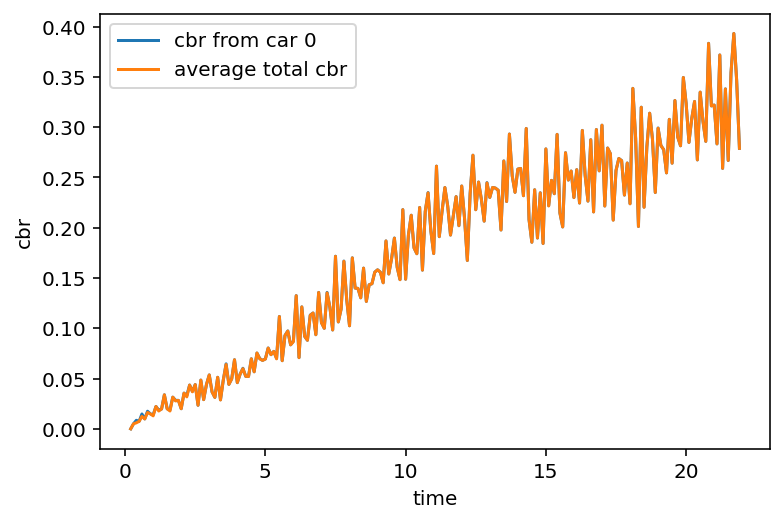

In [25]:
plt.plot(x,y, label="cbr from car 0")
plt.xlabel("time")
plt.ylabel("cbr")
plt.plot(times, vecvalues, label="average total cbr")
plt.legend()
plt.show()

In [29]:
times = vectimes[0]
weight_of_time = 0
values = 0
vecvalues = []

for t in times:
    for tv in time_values:
        for time, value in tv:
            if t == time:
                weight_of_time += 1
                values += value
                break

    vecvalues.append(values / weight_of_time)
    weight_of_time = 0
    values = 0

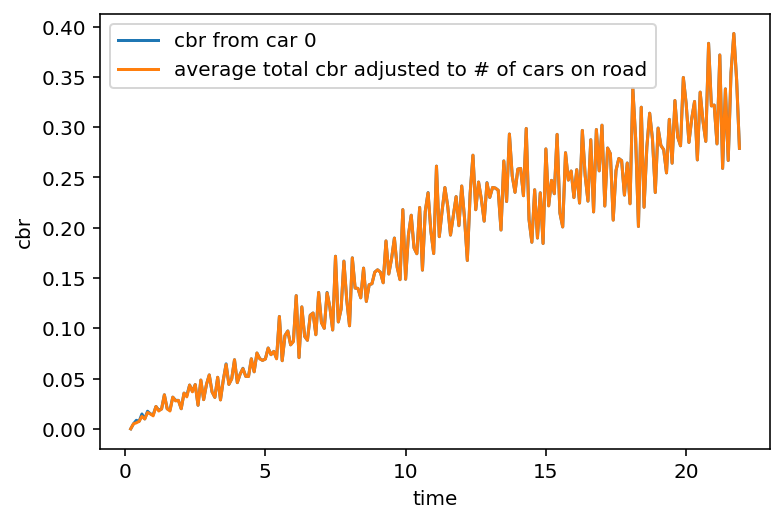

In [30]:
plt.plot(x,y, label="cbr from car 0")
plt.xlabel("time")
plt.ylabel("cbr")
plt.plot(times, vecvalues, label="average total cbr adjusted to # of cars on road")
plt.legend()
plt.show()

In [31]:
def add_car_cbr_to_plot(plt, time_values, i):
    tmp = [[ t for t, v in time_values[i] ],  [ v for t, v in time_values[i] ]]
    plt.plot(tmp[0], tmp[1], label=f"cbr from car {i}")

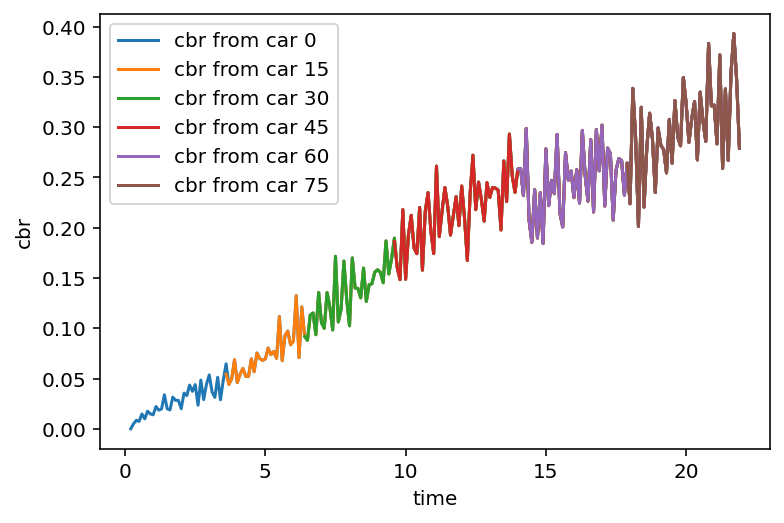

In [32]:
plt.xlabel("time")
plt.ylabel("cbr")
i = 0
#for tv in time_values:
#    tmp = [[ t for t, v in tv ],  [ v for t, v in tv ]] 
#    plt.plot(tmp[0], tmp[1], label=f"cbr from car {i}")
#    i += 1

add_car_cbr_to_plot(plt, time_values, 0)
add_car_cbr_to_plot(plt, time_values, 15)
add_car_cbr_to_plot(plt, time_values, 30)
add_car_cbr_to_plot(plt, time_values, 45)
add_car_cbr_to_plot(plt, time_values, 60)
add_car_cbr_to_plot(plt, time_values, 75)

plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['figure.dpi'] = 144

scale_factor = 1

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)

plt.legend()
plt.show()